<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-capeju/blob/main/Modulo_4_Data_Analysis_with_Python_(IBM)_A01793931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIENCIA Y ANALÍTICA DE DATOS**

**Estudiante: Carlos Jesús Peñaloza Julio**

**Matrícula: A01793931**

**Model Development**

**Linear and Multiple Linear Regression**

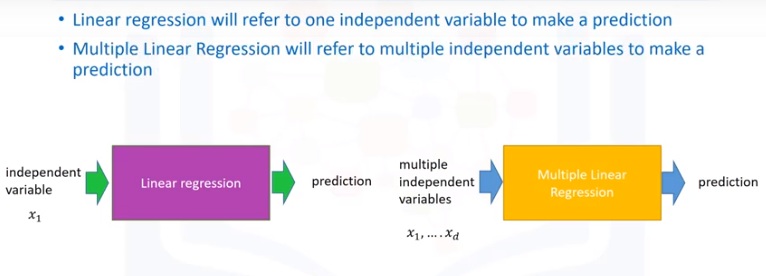


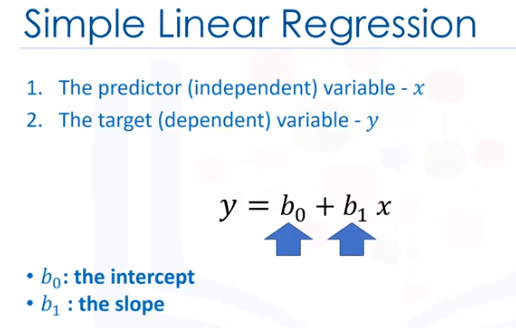

In [97]:
#Si queremos establecer un modelo de regresión lineal en Python, lo podemos hacer de la siguiente manera:

#1. Se debe importar la librería relacionada
from sklearn.linear_model import LinearRegression

#2. Se crea un objeto para función
lm=LinearRegression ()

In [98]:
#Con el siguiente ejemplo se puede ver el uso

#Definamos las variables, pero antes llamemos a las librería que usaremos


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
df = pd.DataFrame()

#El conjunto de datos que se usa en el curso es el siguiente:

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
wget = path


In [99]:
#Acá vemos la información del conjunto de datos
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [100]:
#Continuando con el ejercicio del video, definimos las variables que usaremos

X=df[['highway-mpg']]
Y=df['price']

In [101]:
lm.fit(X,Y)        #Escribimos el modelo de LR

LinearRegression()

In [102]:
Yhat=lm.predict(X) #Obtenemos la predicción
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [103]:
#Teniendo en cuenta le modelo, si queremos conocer b0 y b1 podríamos usar:

lm.intercept_

lm.coef_

#De tal manera que la ecuación de regresión lineal esté dada por:

#Price = lm.intercept_ - lm.coef_* highway-mpg

print(lm.intercept_)
print(lm.coef_)

38423.3058581574
[-821.73337832]


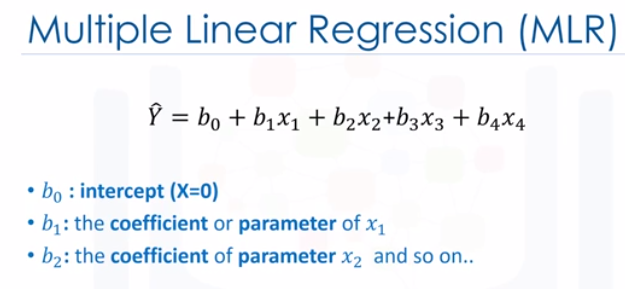

In [104]:
#Basado en el mismo conjunto de datos usado en la LR, escribimos el estimador de la MLR

Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [105]:
lm.fit(Z,df['price'])

LinearRegression()

In [106]:
Yhat=lm.predict(Z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [107]:
#Tal cual se hizo con la LR, podemos conocer b0 y bn del modelo de MLR así:

lm.intercept_

lm.coef_

#De tal manera que la ecuación de regresión lineal esté dada por:

#Price = lm.intercept_ - lm.coef_* highway-mpg

print(lm.intercept_)
print(lm.coef_)

-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


**Model Evaluation using Visualization**

**Regression Plot**

Normalmente usado cuando hay dos variables relacionadas, la relación puede ser positiva o negativa. En el eje horizontal se ubica la variable independiente y en el eje vertical, la variable dependiente.

(0.0, 48174.90135653695)

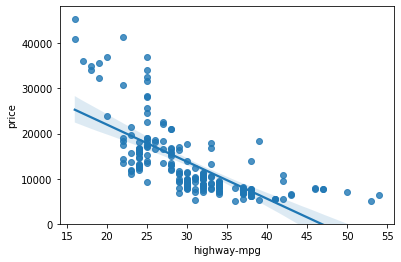

In [108]:
import seaborn as sns

sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)

Al analizar la gráfica se notan puntos por fuera de la línea, estos se pueden interpretar como errores.

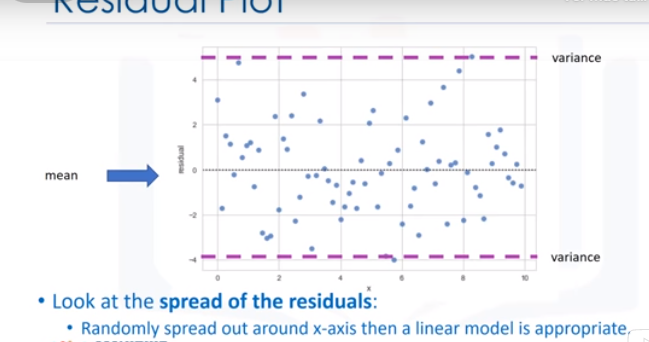

También podemos tener una Residual Plot usando la función *residualplot* para conocer el comportamiento de los valores por fuera de la media y con cambios en la varianza.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


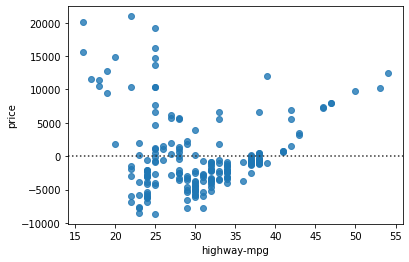

In [109]:
#La función se expresa así:

sns.residplot(df['highway-mpg'], df['price'])

*Distribution Plots*

Cuenta los valores predecidos contra los actuales.

A continuación se deja el código:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


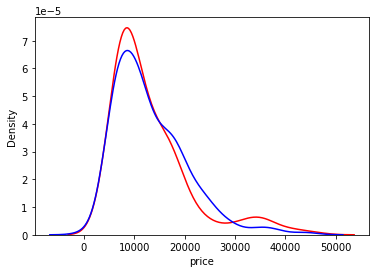

In [110]:
axl=sns.distplot(df['price'],hist=False, color='r',label='Actual Value')

sns.distplot(Yhat,hist=False, color='b',label='Fitted Value', ax=axl)

**Polynomial Regression and Pipelines**

Polynomial regression is a special case of the general linear regression. This method is beneficial for describing curvilinear relationships.

*Curvilinear relationships: It’s what you get by squaring or setting higher-order terms of the predictor variables in the model, transforming the data.*

In [111]:
#Podemos hacer pre-procesamiento para crear un polinomio con características según sea el caso.

from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2, include_bias=False)

#x_polly=pr.fit_transform(Z['horsepower', 'curb-weight'])

In [112]:
#Podemos normalizar 

from sklearn.preprocessing import StandardScaler

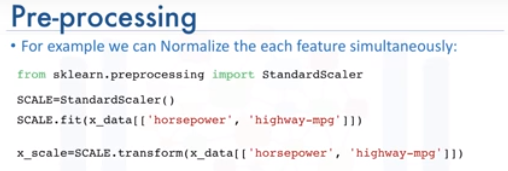

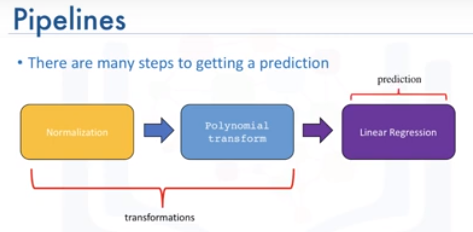

Las librerías necesarias son:

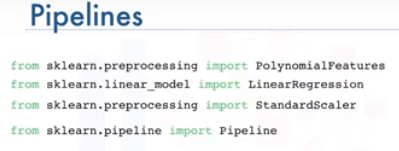

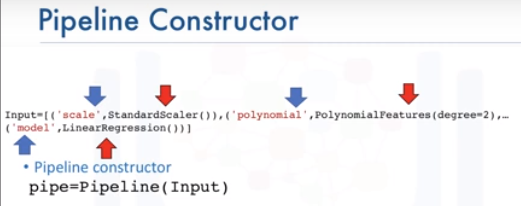

**Measures for In-Sample Evaluation**

Two important measures that we often use to determine the fit of a model are: Mean Square Error (MSE), and R-squared.

*To measure the MSE, we find the difference between the actual value y and the predicted value yhat then square it.*

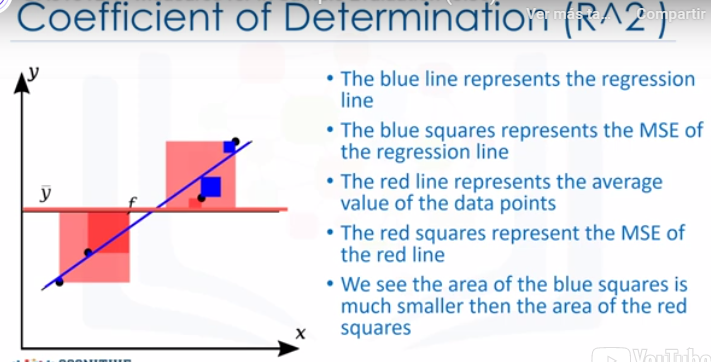

**Prediction and Decision Making**

How can we determine if our model is correct?

*   The first thing you should do is make sure your model results make sense.
*   You should always use Visualization, Numerical measures for evaluation, and Comparing between

The mean square error is perhaps the most intuitive Numerical measure for determining if a model is good or not; let’s see how different measures of Mean square error impact the model.

As the square error increases, the targets get further from the predicted points.
